In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re, os
import pandas as pd
import seaborn as sns


import scienceplots
plt.style.use(['science', 'ieee', 'high-vis', 'grid'])

In [44]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [45]:
PSO_DIR = get_last_folder("../../build/results_pso/")
DIR = PSO_DIR
jitter_files = glob.glob(DIR + "/BEST/*AvalancheTimes.csv")
jitter_files.sort(key=lambda f: int(re.sub('\D', '', f)))

print(f"Found {len(jitter_files)} files")
print(jitter_files)


Found 51 files
['../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_000_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_010_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_020_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_030_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_040_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_050_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_060_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_070_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_080_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_090_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST/ADMC_Iter_100_AvalancheTimes.csv', '../../build/results_pso/2023-03-13_23-37-59/BEST

In [50]:
ListTimes50 = []
ListTimes90 = []
ListTimes95 = []
ListIters = np.arange(0, 501, 10)
for file in jitter_files:
    times_to_avalanche = np.loadtxt(file, skiprows=1) * 1e9
    CumTime50 = np.percentile(times_to_avalanche, 50)
    CumTime90 = np.percentile(times_to_avalanche, 90)
    CumTime95 = np.percentile(times_to_avalanche, 95)
    ListTimes50.append(CumTime50)
    ListTimes90.append(CumTime90)
    ListTimes95.append(CumTime95)

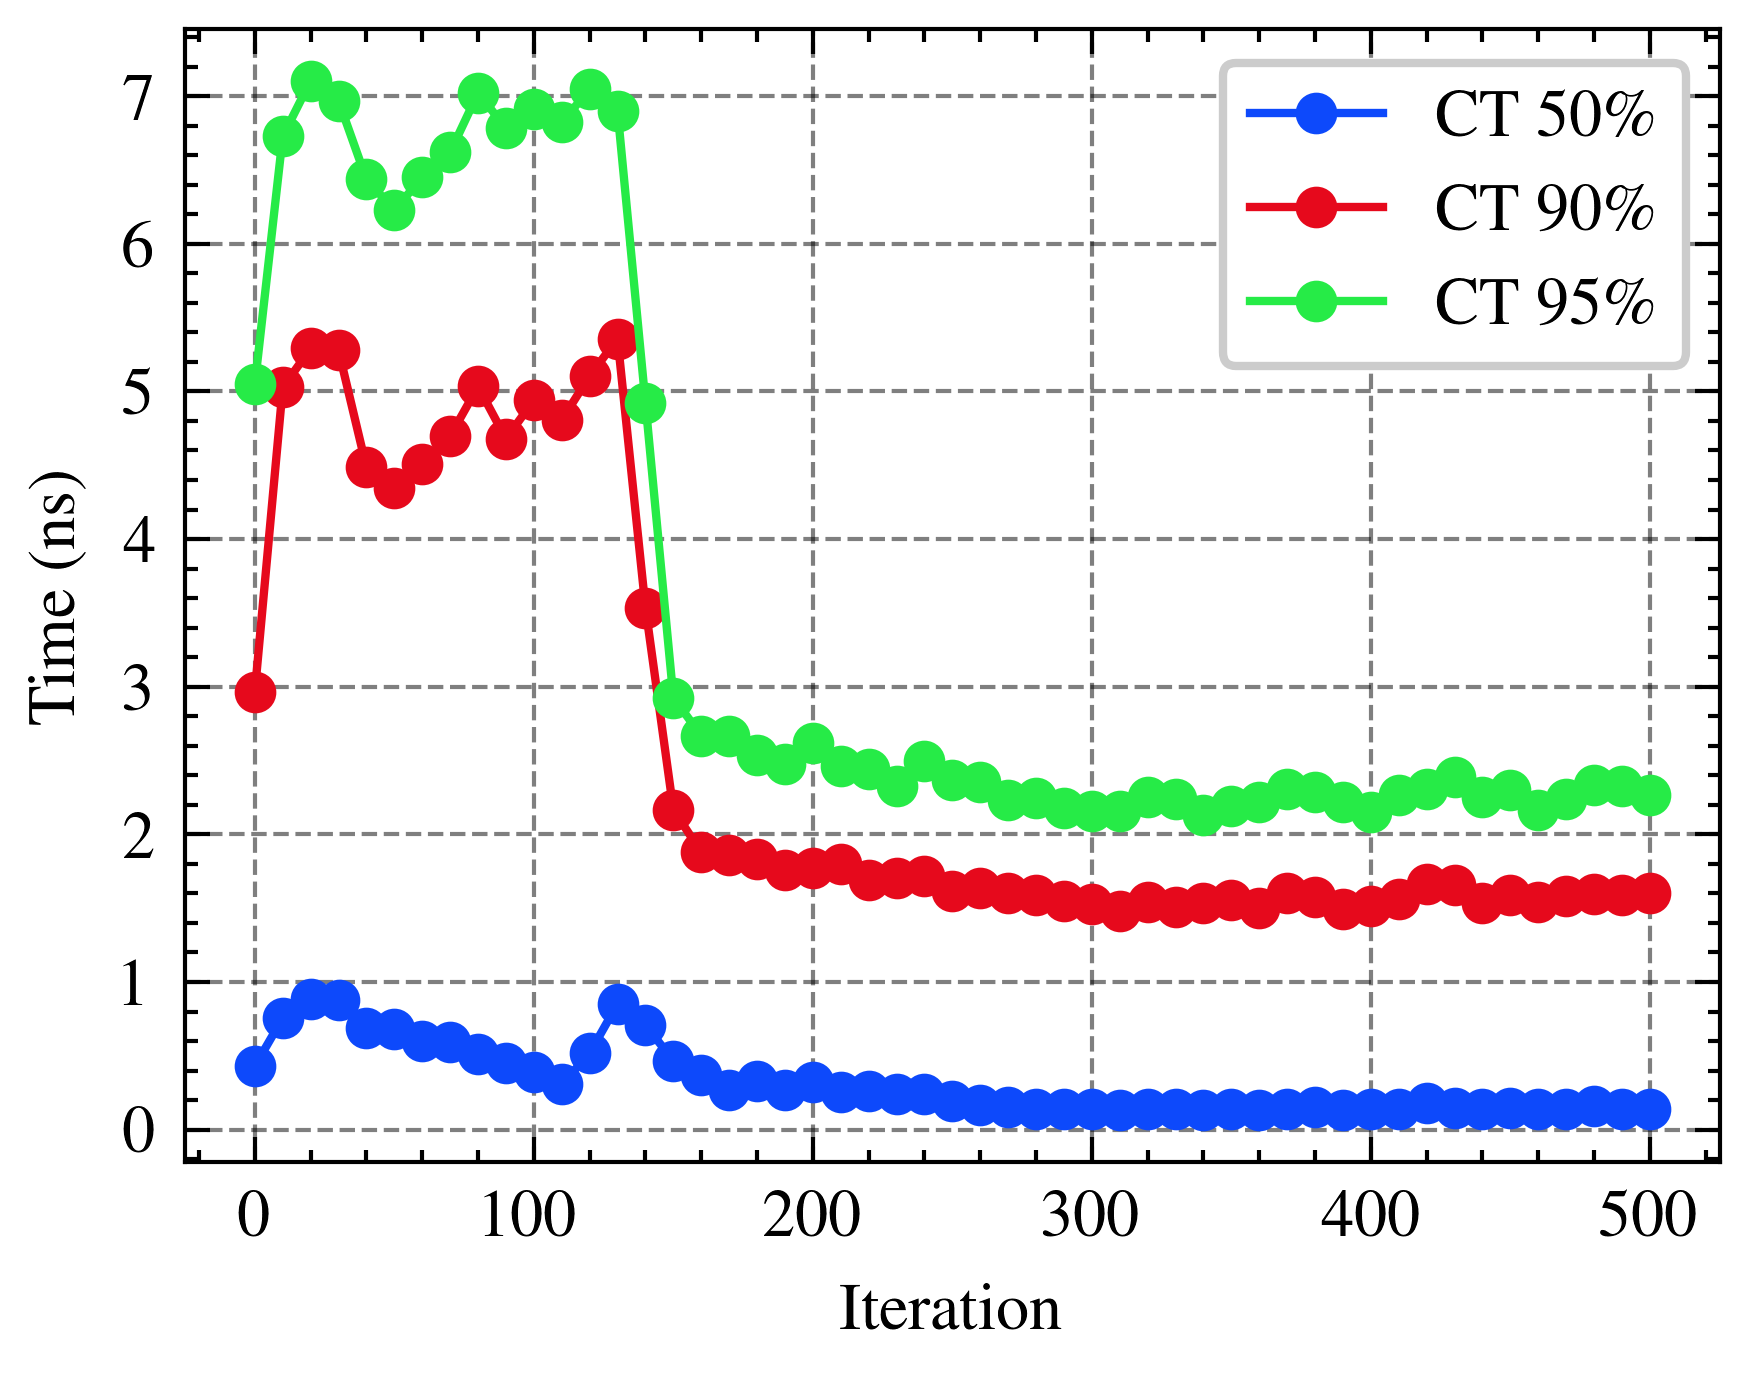

In [51]:
fig, axs = plt.subplots()

axs.plot(ListIters, ListTimes50, "-o", label=r"CT 50\%", markersize=4)
axs.plot(ListIters, ListTimes90, "-o", label=r"CT 90\%", markersize=4)
axs.plot(ListIters, ListTimes95, "-o", label=r"CT 95\%", markersize=4)
axs.set_xlabel("Iteration")
axs.set_ylabel("Time (ns)")
axs.legend()
fig.savefig("/home/hellebor/Cumultative9095_vsIter.pdf")
fig.savefig("/home/hellebor/Cumultative9095_vsIter.png", dpi=300, facecolor="w")
